# Problem 6: Feedforward Network - Interactive Notebook

Explore GELU activation and feedforward networks.

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# When finished, uncomment the following sentence and import your own solution
from solution import FeedForward, NewGELU
# from problem import FeedForward, NewGELU
print("Setup complete!")

Setup complete!


## Visualize GELU vs ReLU

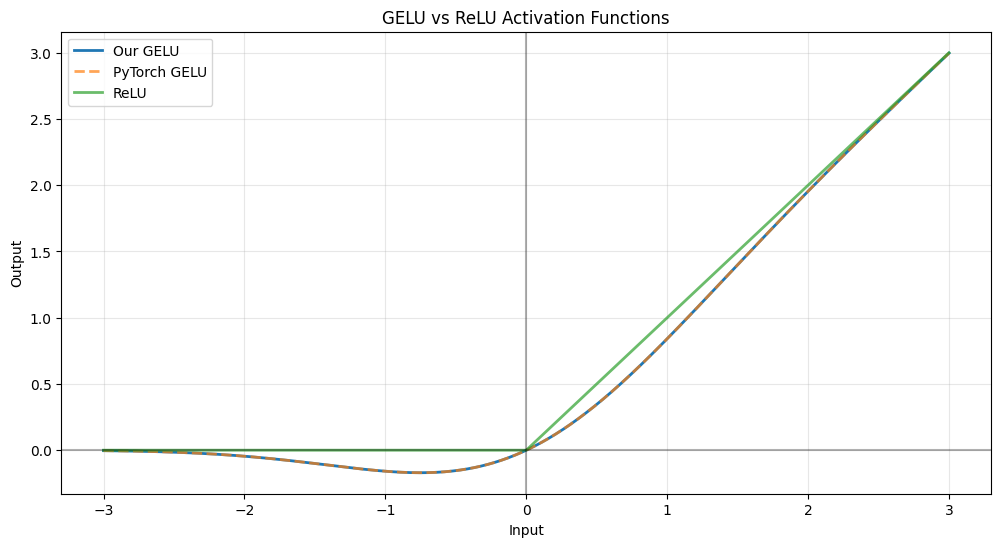

Notice:
- GELU is smooth (no sharp corner at 0 like ReLU)
- GELU can output small negative values
- Our GELU matches PyTorch GELU closely


In [12]:
# Compare GELU with ReLU
x = torch.linspace(-3, 3, 1000)

gelu = NewGELU()
gelu_output = gelu(x)
relu_output = torch.relu(x)
pytorch_gelu = nn.GELU(approximate='tanh')(x)

plt.figure(figsize=(12, 6))
plt.plot(x.numpy(), gelu_output.detach().numpy(), label='Our GELU', linewidth=2)
plt.plot(x.numpy(), pytorch_gelu.detach().numpy(), '--', label='PyTorch GELU', linewidth=2, alpha=0.7)
plt.plot(x.numpy(), relu_output.numpy(), label='ReLU', linewidth=2, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('GELU vs ReLU Activation Functions')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print('Notice:')
print('- GELU is smooth (no sharp corner at 0 like ReLU)')
print('- GELU can output small negative values')
print('- Our GELU matches PyTorch GELU closely')

## Test Feedforward Network

In [13]:
# Create feedforward network
n_embd, n_inner = 768, 3072  # GPT-2 small config
ff = FeedForward(n_embd=n_embd, n_inner=n_inner, dropout=0.0)
ff.eval()

print(f'Input dimension: {n_embd}')
print(f'Hidden dimension: {n_inner} (4x expansion)')
print(f'Output dimension: {n_embd}')
print(f'\nParameters: {sum(p.numel() for p in ff.parameters()):,}')

Input dimension: 768
Hidden dimension: 3072 (4x expansion)
Output dimension: 768

Parameters: 4,722,432


## Visualize Transformation

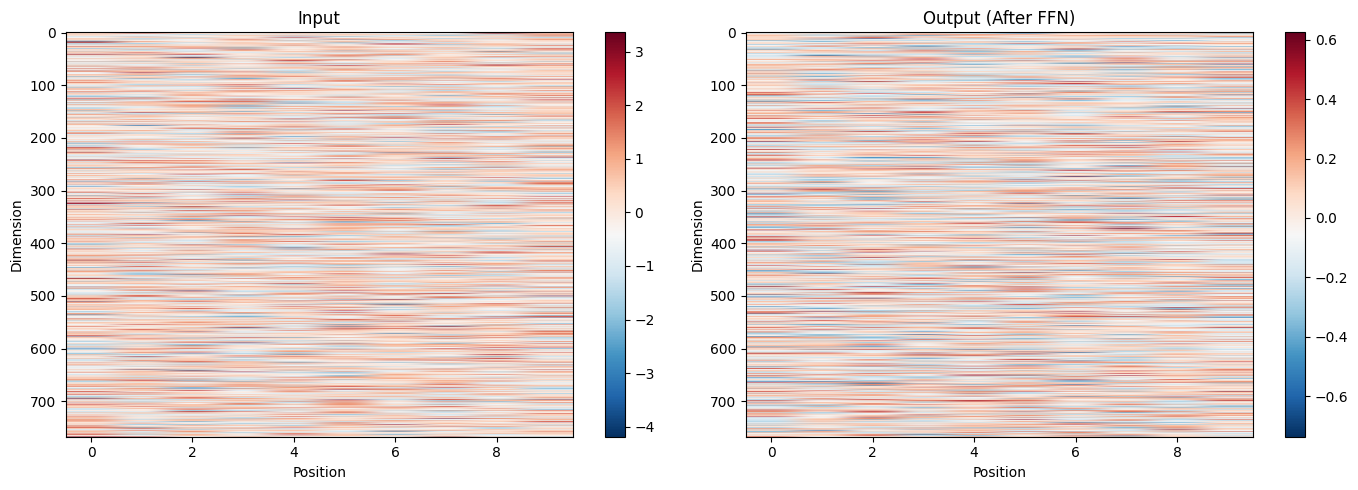

Feedforward network transforms each position independently!


In [14]:
# Test on sample data
seq_len = 10
x = torch.randn(1, seq_len, n_embd)

with torch.no_grad():
    output = ff(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im1 = axes[0].imshow(x.squeeze().T.numpy(), aspect='auto', cmap='RdBu_r')
axes[0].set_title('Input')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Dimension')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(output.squeeze().T.numpy(), aspect='auto', cmap='RdBu_r')
axes[1].set_title('Output (After FFN)')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Dimension')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print('Feedforward network transforms each position independently!')

## Verify Your Implementation

In [15]:
# Quick verification
gelu = NewGELU()
ff = FeedForward(n_embd=768, n_inner=3072)

x_test = torch.randn(2, 10, 768)
output = ff(x_test)

print('✓ GELU implemented')
print('✓ FeedForward implemented')
print(f'✓ Shape preserved: {x_test.shape} → {output.shape}')
print('\n✅ Basic functionality verified!')
print('\nRun "python -m pytest test_feedforward.py -v" for complete validation.')

✓ GELU implemented
✓ FeedForward implemented
✓ Shape preserved: torch.Size([2, 10, 768]) → torch.Size([2, 10, 768])

✅ Basic functionality verified!

Run "python -m pytest test_feedforward.py -v" for complete validation.
